In [1]:
#Exploratory data analysis: Crime against women in India #Reference to Task1 in Internship tasks
#importing basic necessities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#reading dataset
data= pd.read_csv('Crime In India.csv')
data.head()


,SL,State_UT,Year_2019,Year_2020,Year_2021,Mid_Year_Projected_Population_In_Lakhs_2021,Rate_Of_Total_Crime _Against_Women_2021,Chargesheeting_Rate_2021
0,STATES:,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Andhra Pradesh,17746.0,17089.0,17752.0,264.2,67.2,93.5
2,2,Arunachal Pradesh,317.0,281.0,366.0,7.5,49.1,77.6
3,3,Assam,30025.0,26352.0,29046.0,172.6,168.3,52.9
4,4,Bihar,18587.0,15359.0,17950.0,593.7,30.2,69.4


In [2]:
data.shape


(42, 8)

In [3]:
data.columns


Index(['SL', 'State_UT', 'Year_2019', 'Year_2020', 'Year_2021',
       'Mid_Year_Projected_Population_In_Lakhs_2021',
       'Rate_Of_Total_Crime _Against_Women_2021', 'Chargesheeting_Rate_2021'],
      dtype='object')

In [4]:
data.info


<bound method DataFrame.info of                     SL                     State_UT  Year_2019  Year_2020  \
0              STATES:                          NaN        NaN        NaN   
1                    1               Andhra Pradesh    17746.0    17089.0   
2                    2            Arunachal Pradesh      317.0      281.0   
3                    3                        Assam    30025.0    26352.0   
4                    4                        Bihar    18587.0    15359.0   
5                    5                 Chhattisgarh     7689.0     7385.0   
6                    6                          Goa      329.0      219.0   
7                    7                      Gujarat     8799.0     8028.0   
8                    8                      Haryana    14683.0    13000.0   
9                    9             Himachal Pradesh     1636.0     1614.0   
10                  10                    Jharkhand     8760.0     7630.0   
11                  11                    Ka

In [5]:
#checking for missing values
data.isnull().sum()


SL                                             4
State_UT                                       3
Year_2019                                      4
Year_2020                                      3
Year_2021                                      3
Mid_Year_Projected_Population_In_Lakhs_2021    3
Rate_Of_Total_Crime _Against_Women_2021        3
Chargesheeting_Rate_2021                       3
dtype: int64

In [6]:
#The missing values correspond to the NaN values in the rows of State and UT and hence we can remove them
data= data[~np.isnan(data['Year_2019'])]
data.head()


,SL,State_UT,Year_2019,Year_2020,Year_2021,Mid_Year_Projected_Population_In_Lakhs_2021,Rate_Of_Total_Crime _Against_Women_2021,Chargesheeting_Rate_2021
1,1,Andhra Pradesh,17746.0,17089.0,17752.0,264.2,67.2,93.5
2,2,Arunachal Pradesh,317.0,281.0,366.0,7.5,49.1,77.6
3,3,Assam,30025.0,26352.0,29046.0,172.6,168.3,52.9
4,4,Bihar,18587.0,15359.0,17950.0,593.7,30.2,69.4
5,5,Chhattisgarh,7689.0,7385.0,7344.0,147.6,49.8,88.5


In [8]:
data.isnull().sum()



SL                                             3
State_UT                                       0
Year_2019                                      0
Year_2020                                      0
Year_2021                                      0
Mid_Year_Projected_Population_In_Lakhs_2021    0
Rate_Of_Total_Crime _Against_Women_2021        0
Chargesheeting_Rate_2021                       0
dtype: int64

In [9]:
#Drop the SL column
data= data.drop('SL',axis=1)
data.head()


,State_UT,Year_2019,Year_2020,Year_2021,Mid_Year_Projected_Population_In_Lakhs_2021,Rate_Of_Total_Crime _Against_Women_2021,Chargesheeting_Rate_2021
1,Andhra Pradesh,17746.0,17089.0,17752.0,264.2,67.2,93.5
2,Arunachal Pradesh,317.0,281.0,366.0,7.5,49.1,77.6
3,Assam,30025.0,26352.0,29046.0,172.6,168.3,52.9
4,Bihar,18587.0,15359.0,17950.0,593.7,30.2,69.4
5,Chhattisgarh,7689.0,7385.0,7344.0,147.6,49.8,88.5


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result 

<AxesSubplot:xlabel='Rate_Of_Total_Crime _Against_Women_2021'>

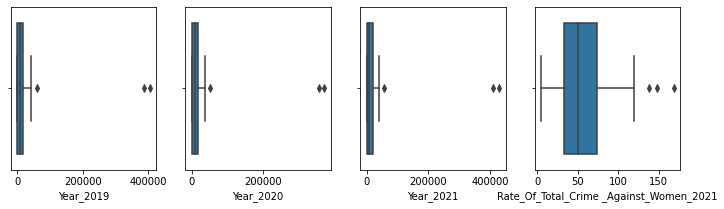

In [10]:
#Checking for univariate outliers
plt.rcParams['figure.figsize']=(12,3)
plt.subplot(1,4,1)
sns.boxplot(data['Year_2019'])
plt.subplot(1,4,2)
sns.boxplot(data['Year_2020'])
plt.subplot(1,4,3)
sns.boxplot(data['Year_2021'])
plt.subplot(1,4,4)
sns.boxplot(data['Rate_Of_Total_Crime _Against_Women_2021'])


In [13]:
#Finding descriptive statistics
data.describe()


,Year_2019,Year_2020,Year_2021,Mid_Year_Projected_Population_In_Lakhs_2021,Rate_Of_Total_Crime _Against_Women_2021,Chargesheeting_Rate_2021
count,38.000000,38.000000,38.000000,38.000000,38.00000,38.000000
mean,31999.421053,29328.947368,33810.947368,524.544737,61.10000,79.023684
std,88228.692948,81017.977984,93074.395583,1458.359654,38.29272,13.110063
min,38.000000,15.000000,9.000000,0.300000,5.10000,48.400000
25%,375.500000,286.000000,348.750000,11.900000,32.45000,74.325000
50%,8224.500000,7507.500000,7729.000000,145.950000,50.15000,79.850000
75%,18538.750000,17615.500000,20400.000000,332.400000,74.27500,87.725000
max,405326.000000,371503.000000,428278.000000,6644.700000,168.30000,98.300000


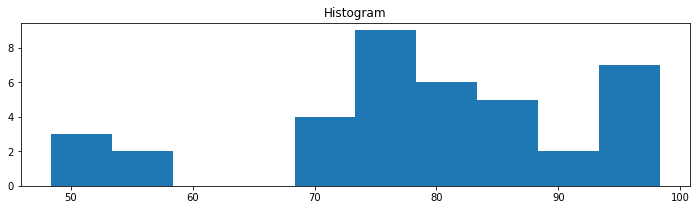

In [15]:
#Histogram
plt.hist(data['Chargesheeting_Rate_2021'])

plt.title("Histogram")

plt.show()


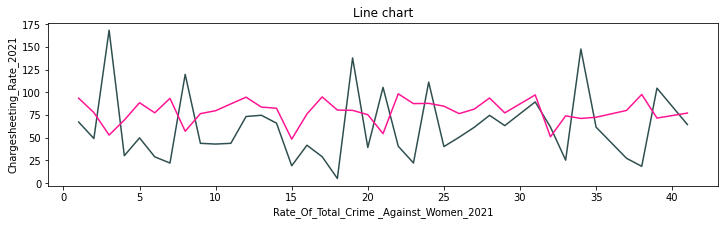

In [29]:
#Line chart with year against own
plt.plot(data['Rate_Of_Total_Crime _Against_Women_2021'],color='darkslategrey')
plt.plot(data['Chargesheeting_Rate_2021'],color='deeppink')

#adding title to the plot
plt.title("Line chart")

#setting the x and y labels
plt.xlabel('Rate_Of_Total_Crime _Against_Women_2021')
plt.ylabel('Chargesheeting_Rate_2021')

#adding the legends
plt.show()


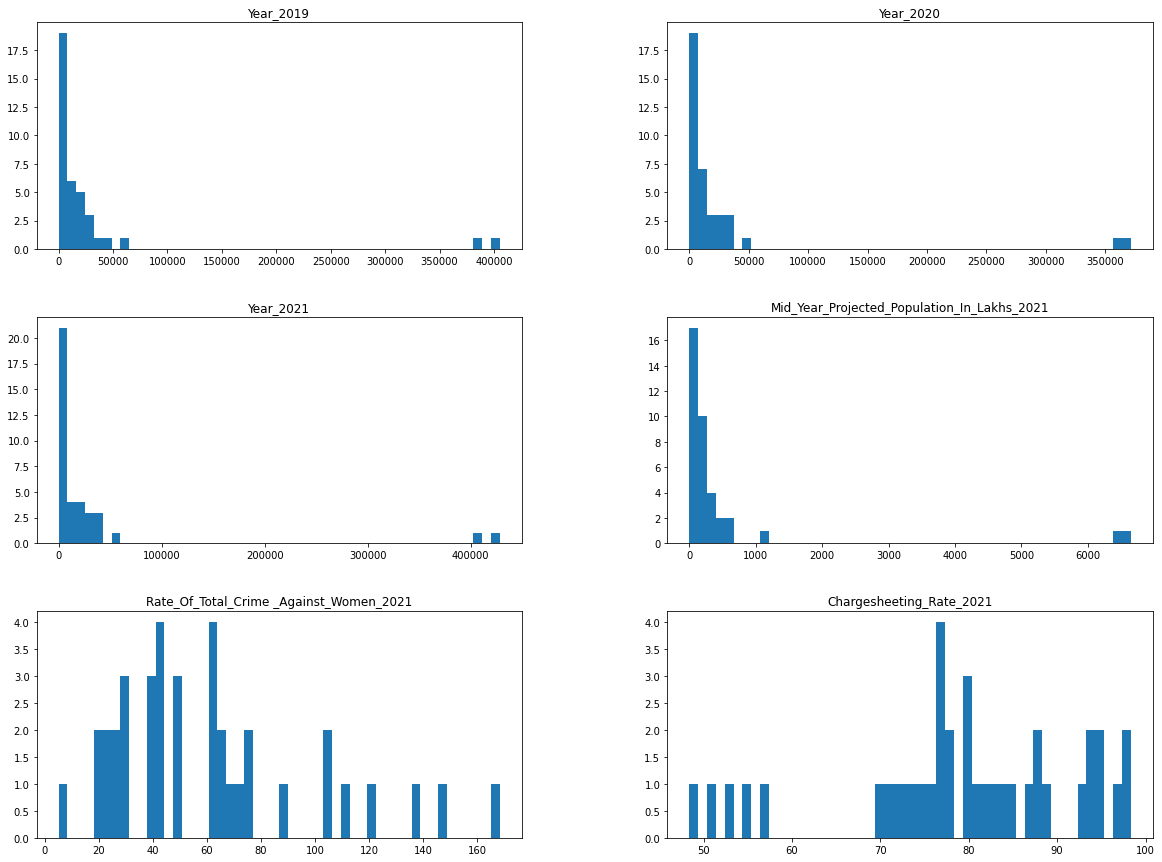

In [23]:
data.hist(bins= 50, grid= False, figsize=(20,15));


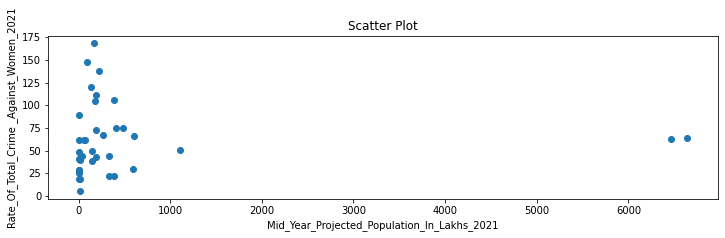

In [24]:
#Finding scatter plot of Crime rate and mid year projected population 
#scatter plot with year against own
plt.scatter(data['Mid_Year_Projected_Population_In_Lakhs_2021'],data['Rate_Of_Total_Crime _Against_Women_2021'])

#adding title to the plot
plt.title("Scatter Plot")

#setting the x and y labels
plt.xlabel('Mid_Year_Projected_Population_In_Lakhs_2021')
plt.ylabel('Rate_Of_Total_Crime _Against_Women_2021')

#adding the legends
plt.show()


<AxesSubplot:>

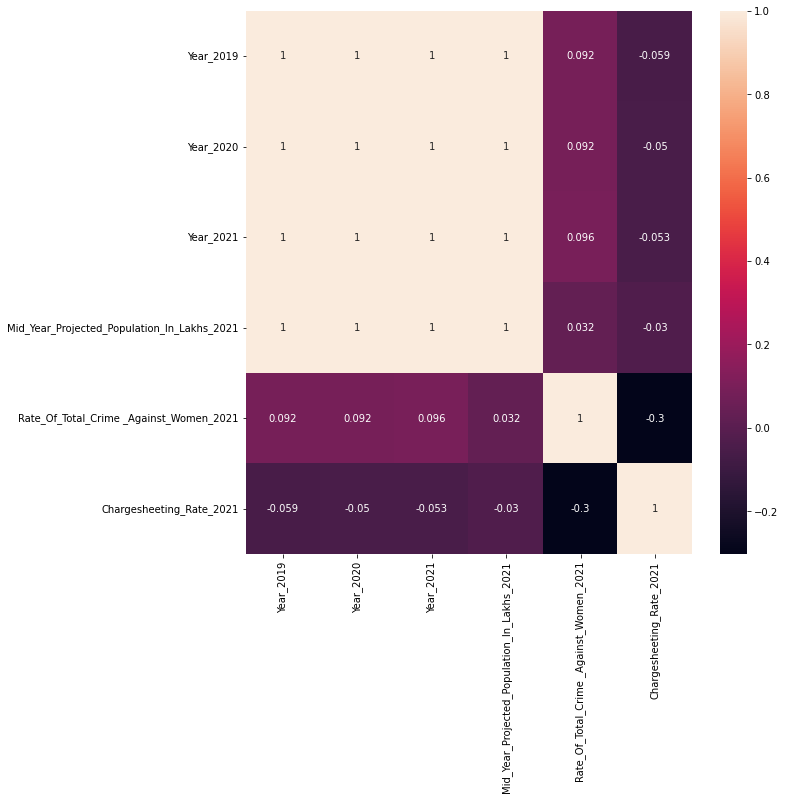

In [25]:
#Plotting heatmap to gain further insights
fig,ax= plt.subplots(figsize=(10,10))
corr= data.corr()
sns.heatmap(corr,annot=True,ax=ax)


In [ ]:
# It is oberserved that the columns Rate_Of_Total_Crime _Against_Women_2021 and Chargesheeting_Rate_2021 have a negative correlation (-0.3) in between 
#As per data.tail() , the total crime rate against women in India in 2021 was 64.5% and chargesheet rate was 77.1%